In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
#加载数据  sklearn 自带
from sklearn.datasets import  load_boston
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler#标准化处理   数据预处理
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import  BayesianRidge

In [2]:
boston=load_boston()

In [3]:
data=boston['data']
target=boston['target']
feature_names=boston['feature_names']
df_data=pd.DataFrame(data,index=range(len(target)),columns=feature_names)
df_target=pd.DataFrame(target,index=range(len(target)),columns=['price'])

In [4]:
x_train,x_test,y_train,y_test=train_test_split(df_data,df_target,test_size=0.3)

In [5]:
st=StandardScaler()
st.fit_transform(x_train,x_test)

array([[ 0.10662819, -0.50337031,  1.03150893, ...,  0.84758688,
        -3.60622331,  0.97883633],
       [-0.39147157,  1.31885195, -1.10572852, ..., -1.38257334,
         0.41760911, -0.8076163 ],
       [-0.3647027 , -0.50337031,  1.58404167, ...,  1.29361893,
         0.44941018,  0.45434658],
       ...,
       [-0.37765416,  0.3874939 , -0.75292397, ...,  0.35695163,
         0.1932174 ,  0.03562411],
       [-0.13451192, -0.50337031,  1.24727369, ..., -1.60558936,
        -2.7860076 ,  0.56301159],
       [-0.39252418, -0.50337031, -1.28942014, ...,  0.17853882,
         0.44941018, -1.0032133 ]])

In [6]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
print('准确率', lr.score(x_test, y_test))

准确率 0.6824031070802846


/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [7]:
bayes = BayesianRidge()
bayes.fit(x_train,y_train)
bayes_predict = bayes.predict(x_test)
print('准确率', bayes.score(x_test, y_test))

准确率 0.6570750868523616


/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


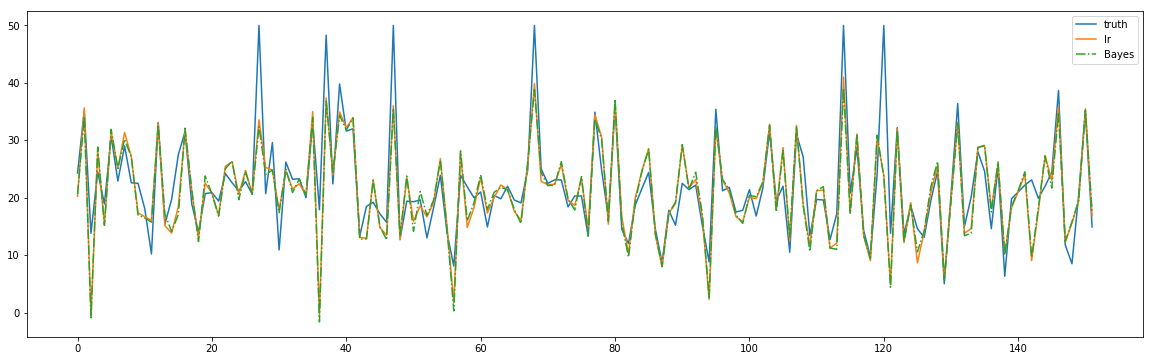

In [9]:
plt.figure(figsize=(20, 6))
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
x=range(len(y_test))
plt.plot(x, y_test, linestyle='-')
plt.plot(x, lr_predict, linestyle='-')
plt.plot(x, bayes_predict, linestyle='-.')
plt.legend(['truth', 'lr', 'Bayes'])
plt.show()